#Linear regression
LR is a basic predictive analytics technique.
It uses historical data to make a prediction. 

LR applications
* economics - predicting growth
* business - predicting product sales, employee performance
* social science - predicting political leanings from gender or race
* healthcare - predicting blood pressure levels from weight


#Method
We split dara  into training and test sets
fit a linear regression model to observed data
use the LR model to predict any future values. 

If we have found that the price (P) of a house is linearly dependent upon its size (S) from historical dara , and if we we found that a house’s price is exactly 90 times its size.

The equation will look like this:

P = 90*S
If we have a house that is 1,500 square feet, 
we can calculate its price to be:

Basic concepts of math

* There are two types of variables in a linear regression model:

* X -  input or predictor variable(s) - help predict the output variable. 
* y -  output variable is the variable that we want to predict.

The equation is  yₑ = c + β=m X

# Ordinary Least Squares

#Python modules used

* statsmodels —  provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

* scikit-learn — provides simple and efficient tools for data mining and data analysis.

In [4]:
# import the module
import pandas  as pd   # To work with tables
import numpy  as np    # For maths
import seaborn as sns   # For advanced plots
import cufflinks  # For interactive plots
from matplotlib import pyplot as plt

cufflinks.go_offline()

In [5]:

# import data
url="https://raw.githubusercontent.com/ShilpaSayuraML/data-science-mastsr/master/data/Advertising.csv"

# Import a dataset of advertising spends
df = pd.read_csv(url, index_col=0)

# Display the first five rows of the data
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


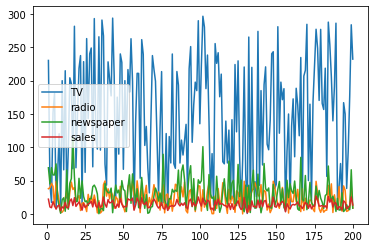

In [8]:
df.plot()

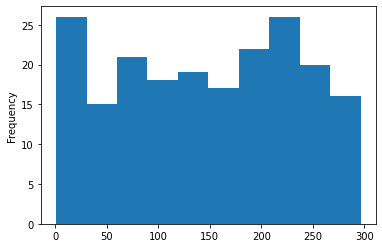

In [12]:
df['TV'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19c6972640>,
      dtype=object)

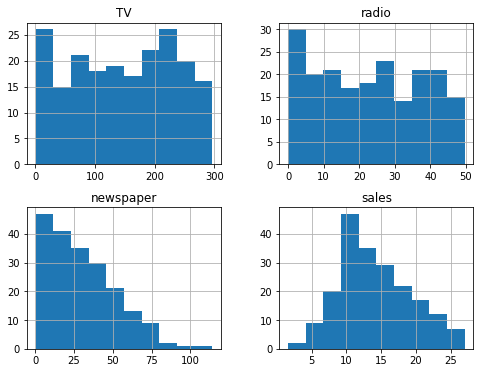

In [16]:
df.hist(figsize=(8,6))

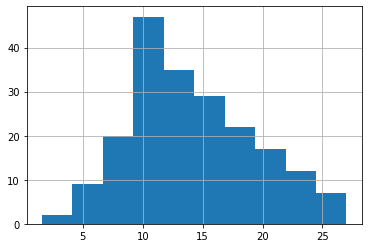

In [25]:
df['sales'].hist()

In [30]:
# Data can be pivoted and reflowed:

# Make a table with one row per ad channel
pivoted = pd.melt(df.reset_index(), id_vars=['index', 'sales'])
pivoted



,index,sales,variable,value
0,1,22.1,TV,230.1
1,2,10.4,TV,44.5
2,3,9.3,TV,17.2
3,4,18.5,TV,151.5
4,5,12.9,TV,180.8
...,...,...,...,...
595,196,7.6,newspaper,13.8
596,197,9.7,newspaper,8.1
597,198,12.8,newspaper,6.4
598,199,25.5,newspaper,66.2


In [32]:
# Rename columns to be more friendly
pivoted = pivoted.rename(columns={'index':'transaction', 'value':'spend', 'variable':'channel'})

pivoted.head()

,transaction,sales,channel,spend
0,1,22.1,TV,230.1
1,2,10.4,TV,44.5
2,3,9.3,TV,17.2
3,4,18.5,TV,151.5
4,5,12.9,TV,180.8


<Figure size 864x432 with 0 Axes>

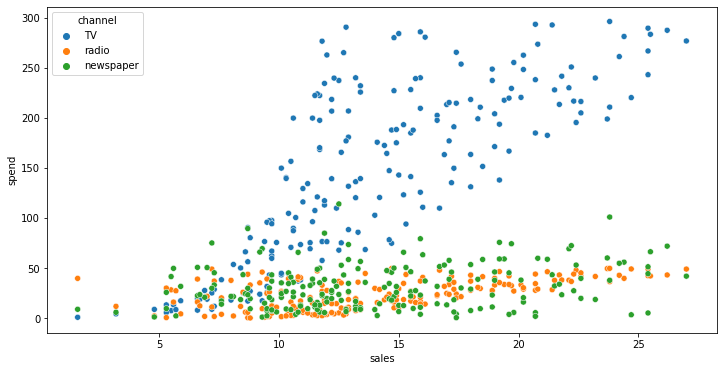

<Figure size 864x432 with 0 Axes>

In [34]:
#seaborn plots.

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=pivoted, x='sales', y='spend', hue='channel')
plt.figure(figsize=(12, 6))

#Modeling the data
build a simple linear regression model to predict sales as a function to advertising spend.

In [44]:
# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'radio']
X = df[predictors]
y = df['sales']
X.head(5)

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [45]:
y.head(5)

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [56]:
X['TV'][:1][1]

230.1

In [71]:
y[:1][1]

22.1

In [75]:
# Initialise and fit model
lm = LinearRegression()
model_TV_Radio = lm.fit(X, y)


In [77]:
# examine the model coefficients
print(f'c = {model_TV_Radio.intercept_}')
print(f'm = {model_TV_Radio.coef_}')

c = 2.9210999124051362
m = [0.04575482 0.18799423]


In [83]:
# predict Sales for a combination of TV and Radio advertising spend
new_X = [[300, 200]]
print(model_TV_Radio.predict(new_X))

[54.24638977]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



#Model validation

In [85]:
from sklearn.model_selection import train_test_split

# Divide the data 80-20 into a training and test set
train, test = train_test_split(df, test_size=0.2)
# Build linear regression model on the training data using all predictors
predictors = ['TV', 'radio', 'newspaper']
X = train[predictors]
y = train['sales']

In [86]:
# Initialise and fit model
lm = LinearRegression()
model_All = lm.fit(X, y)

In [88]:
# Use the model to predict sales for our test data
test['predictions'] = model_All.predict(test[predictors])
test['predictions']

151    18.271953
172    14.241857
85     20.801665
110    19.786953
44     13.900007
137    11.576512
83     10.130172
185    18.501210
174    11.965802
92      4.382599
136    14.154932
191    12.635086
166    13.874642
31     21.559200
190     6.018316
29     19.425677
118     6.536990
143    19.217754
182    13.849163
1      20.363971
21     17.978902
145     9.994529
70     21.162450
93     19.028706
130     7.759304
41     16.337573
106    17.854555
198    12.817429
43     21.708664
115    15.338160
79      8.905241
176    24.789275
84     14.442227
140    19.846538
67      9.122262
163    14.920142
126     9.080050
56     21.215070
152     9.845426
134    19.202864
Name: predictions, dtype: float64

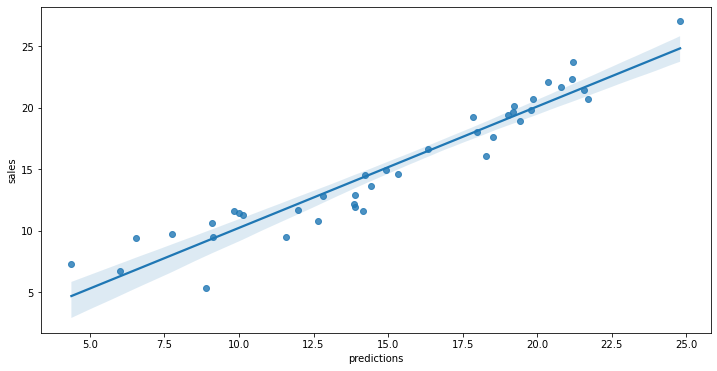

In [90]:
#Plot pred8ctions
plt.figure(figsize=(12, 6))
ax = sns.regplot(y='sales', x='predictions', data=test)

"R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable. 


In [91]:
r_squared = model_All.score(test[predictors], test["sales"])

print(f'Model R²: {r_squared:.2f}')



Model R²: 0.91


# Up for a challange?
Build a model predicting sales as a function of only radio and newpaper spend, and compare it to previous model.